In [145]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')

# Modeling
import statsmodels.api as sm

from scipy.stats import pearsonr

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

In [2]:
df = pd.read_csv('churn3.csv')

In [3]:
df.head()

,customer_id,tenure,monthly_charges,total_charges
0,0013-SMEOE,71,109.70,7904.25
1,0014-BMAQU,63,84.65,5377.80
2,0016-QLJIS,65,90.45,5957.90
3,0017-DINOC,54,45.20,2460.55
4,0017-IUDMW,72,116.80,8456.75


In [4]:
df.shape

(1695, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 4 columns):
customer_id        1695 non-null object
tenure             1695 non-null int64
monthly_charges    1695 non-null float64
total_charges      1685 non-null float64
dtypes: float64(2), int64(1), object(1)
memory usage: 53.0+ KB


In [266]:
df['customer_id'].ftype

'object:dense'

In [6]:
df.tail(10)

,customer_id,tenure,monthly_charges,total_charges
1685,9945-PSVIP,25,18.70,383.65
1686,9950-MTGYX,28,20.30,487.95
1687,9953-ZMKSM,63,25.25,1559.30
1688,9958-MEKUC,72,103.95,7517.70
1689,9959-WOFKT,71,106.70,7382.25
1690,9964-WBQDJ,71,24.40,1725.40
1691,9972-EWRJS,67,19.25,1372.90
1692,9975-GPKZU,46,19.75,856.50
1693,9993-LHIEB,67,67.85,4627.65
1694,9995-HOTOH,63,59.00,3707.60


In [267]:
from scipy.stats import iqr
iqr(df.tenure)

23.0

In [7]:
df_iqr = df.describe().quantile(.75) - df.describe().quantile(.25)
df_iqr

tenure               30.697659
monthly_charges      65.509601
total_charges      2713.212960
dtype: float64

In [8]:
df.sort_values(['total_charges'], ascending=True)

,customer_id,tenure,monthly_charges,total_charges
188,1099-GODLO,1,20.35,20.35
1449,8559-WNQZS,1,20.45,20.45
239,1407-DIGZV,3,19.10,52.00
233,1354-YZFNB,4,19.55,68.80
127,0754-EEBDC,4,19.90,76.65
1055,6368-TZZDT,4,19.50,96.85
428,2587-YNLES,6,20.10,100.35
616,3717-FDJFU,5,20.45,106.90
327,2030-BTZRO,6,20.40,107.60
1552,9150-KPBJQ,6,19.65,116.85


In [9]:
print(df.isnull().sum())

customer_id         0
tenure              0
monthly_charges     0
total_charges      10
dtype: int64


In [10]:
df = df.fillna(0)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2ad6b908>]],
      dtype=object)

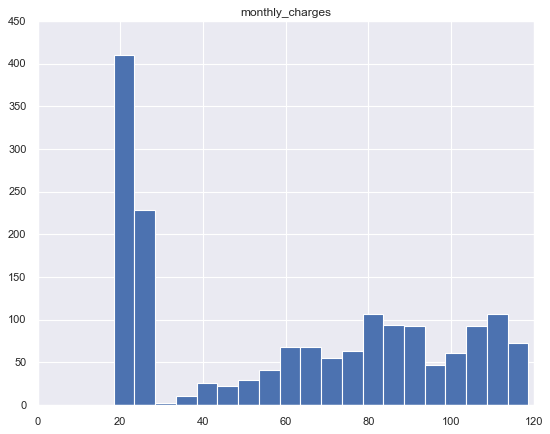

In [268]:
df.hist(column='monthly_charges', bins=20)

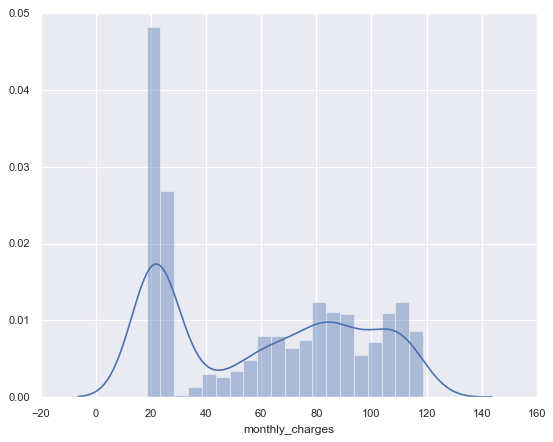

In [269]:
sns.distplot(df.monthly_charges, bins=20)

In [12]:
df2 = df.drop(['customer_id'], axis=1)

In [13]:
df2.head()

,tenure,monthly_charges,total_charges
0,71,109.70,7904.25
1,63,84.65,5377.80
2,65,90.45,5957.90
3,54,45.20,2460.55
4,72,116.80,8456.75


Text(0.5, 1.0, 'total_charges')

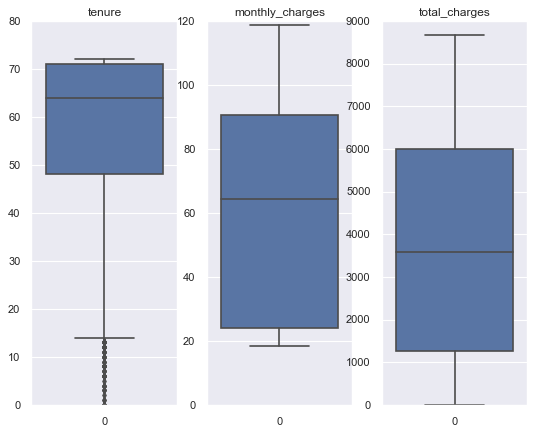

In [147]:
sns.set(font_scale=.9)

plt.subplot(1,3,1)
sns.boxplot(data=df2['tenure'])
plt.title('tenure')
plt.subplot(1,3,2)
sns.boxplot(data=df2['monthly_charges'])
plt.title('monthly_charges')
plt.subplot(1,3,3)
sns.boxplot(data=df2['total_charges'])
plt.title('total_charges')

In [15]:
X = df2.drop(['total_charges'], axis=1)
print(X.head())

y=df[['total_charges']]
print(y.head())

   tenure  monthly_charges
0      71           109.70
1      63            84.65
2      65            90.45
3      54            45.20
4      72           116.80
   total_charges
0        7904.25
1        5377.80
2        5957.90
3        2460.55
4        8456.75


In [229]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.80, random_state=123)

In [230]:
train = pd.concat([X_train, y_train], axis=1)
print("Train columns:  %s" % list(train.columns))
print("Train dimensions (rows, columns):", train.shape)

Train columns:  ['tenure', 'monthly_charges', 'total_charges']
Train dimensions (rows, columns): (1356, 3)


In [231]:
test = pd.concat([X_test, y_test], axis=1)
print("Test columns:  %s" % list(test.columns))
print("Test dimensions (rows, columns):", test.shape)

Test columns:  ['tenure', 'monthly_charges', 'total_charges']
Test dimensions (rows, columns): (339, 3)


In [232]:
if X_train.shape[0] == y_train.shape[0]:
    print("X & y train rows ARE equal")
else:
    print("X & y train rows ARE NOT equal")


if X_test.shape[0] == y_test.shape[0]:
    print("X & y test rows ARE equal")
else:
    print("X & y test rows ARE NOT equal")

if train.shape[1] == test.shape[1]:
    print("Number of columns in train & test ARE equal")
else:
    print("Number of columns in train & test ARE NOT equal")

train_split = train.shape[0] / (train.shape[0] + test.shape[0])
test_split = test.shape[0] / (train.shape[0] + test.shape[0])

print("Train Split: %.2f" % train_split)
print("Test Split: %.2f" % test_split)

X & y train rows ARE equal
X & y test rows ARE equal
Number of columns in train & test ARE equal
Train Split: 0.80
Test Split: 0.20


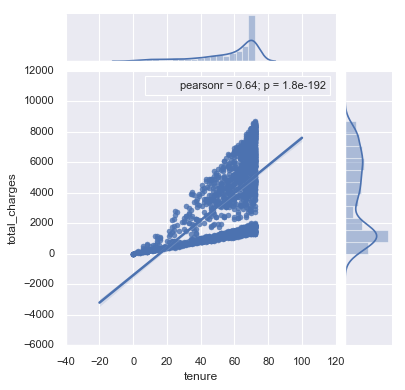

In [233]:
with sns.axes_style('darkgrid'):
    j1 = sns.jointplot('tenure', 'total_charges', data=df2, kind='reg', height=5)
    j1.annotate(stats.pearsonr)

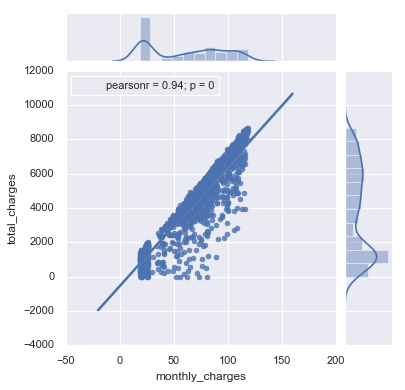

In [234]:
with sns.axes_style('darkgrid'):
    j2 = sns.jointplot('monthly_charges', 'total_charges', data=df2, kind='reg', height=5)
    j2.annotate(stats.pearsonr)

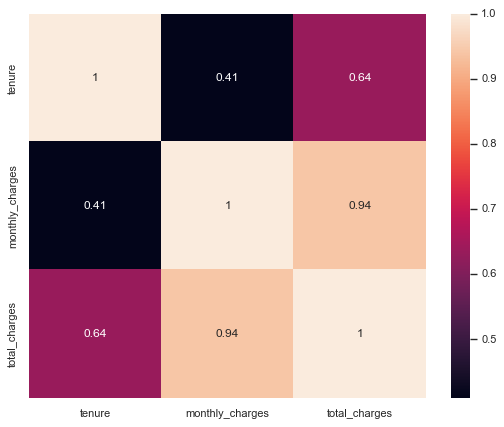

In [235]:
sns.heatmap(df2.corr(), annot=True)

In [236]:
column_names = X_train.columns
r_and_p_values = [pearsonr(X_train[col], y_train.total_charges) for col in column_names]

charges_corr_dict = dict(zip(column_names, r_and_p_values))

tenure_r = charges_corr_dict['tenure']
monthly_r = charges_corr_dict['monthly_charges']
tenure_r2 = tenure_r[0]
tenure_p = tenure_r[1]
monthly_r2 = monthly_r[0]
monthly_p = monthly_r[1]


In [237]:
for col in X_train:
    r, p = pearsonr(X_train[col], y_train.total_charges)
    print('r: {:.2%} -- p: {:.2E}'.format(r, p))

r: 63.50% -- p: 5.69E-154
r: 94.17% -- p: 0.00E+00


In [238]:
print('Pearson\'s R is {:.2%} with a significance p-value of {:.2E}'.format(tenure_r2, tenure_p))

Pearson's R is 63.50% with a significance p-value of 5.69E-154


In [239]:
print('Pearson\'s R is {:.2%} with a significance p-value of {:.2%}'.format(monthly_r2, monthly_p))

Pearson's R is 94.17% with a significance p-value of 0.00%


In [240]:
lm1 = LinearRegression(fit_intercept=False)
lm1.fit(X_train[['tenure']], y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [241]:
lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coef = lm1.coef_
print(lm1_coef)

0.0
[[67.81557644]]


In [242]:
print('Univariate - final_exam = b + m1 * tenure')
print('    y-intercept  (b): %.2f' % lm1_y_intercept)
print('    coefficient (m1): %.2f' % lm1_coef[0])

Univariate - final_exam = b + m1 * tenure
    y-intercept  (b): 0.00
    coefficient (m1): 67.82


In [273]:
y_pred_lm1 = lm1.predict(X_train[['tenure']])

In [244]:
mse_lm1 = mean_squared_error(y_train, y_pred_lm1)
print("lm1\n  mse: {:.3}".format(mse_lm1))

lm1
  mse: 4.21e+06


In [245]:
r2_lm1 = r2_score(y_train, y_pred_lm1)
print('  {:.2%} of the variance in total charges can be explained by tenure.'.format(r2_lm1))

  37.46% of the variance in total charges can be explained by tenure.


In [246]:
print(y_pred_lm1)

[[4475.82804516]
 [4814.90592737]
 [4068.93458651]
 ...
 [4747.09035093]
 [4814.90592737]
 [2712.62305767]]


Text(0.5, 1.0, 'Predicted vs Actual Final Grade')

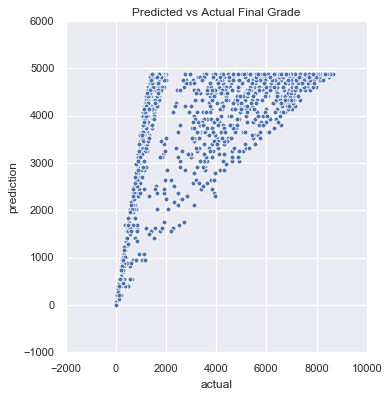

In [247]:
pd.DataFrame({'actual': y_train.total_charges,
              'lm1': y_pred_lm1.ravel()})\
    .melt(id_vars=['actual'], var_name='model', value_name='prediction')\
    .pipe((sns.relplot, 'data'), x='actual', y='prediction')

plt.plot(c='white', ls=':')
plt.title('Predicted vs Actual Final Grade')

In [248]:
lm2 = LinearRegression(fit_intercept=False)
lm2.fit(X_test[['tenure', 'monthly_charges']], y_test)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [249]:
lm2_y_intercept = lm2.intercept_
print(lm2_y_intercept)

lm2_coef = lm2.coef_
print(lm2_coef)

0.0
[[ 8.02695945 56.78761942]]


In [250]:
print('Multivariate - final_exam = b + m1 * tenure + m2 * monthly_charges')
print('    y-intercept  (b): %.2f' % lm2_y_intercept)
print('    coefficient (m1): %.2f' % lm2_coef[0][0])
print('    coefficient (m2): %.2f' % lm2_coef[0][1])

Multivariate - final_exam = b + m1 * tenure + m2 * monthly_charges
    y-intercept  (b): 0.00
    coefficient (m1): 8.03
    coefficient (m2): 56.79


In [251]:
X_train.shape

(1356, 2)

In [257]:
y_pred_lm2 = lm2.predict(X_train)

In [259]:
mse_lm2 = mean_squared_error(y_train, y_pred_lm2)
print("lm2\n  mse: {:.3}".format(mse_lm2))

lm2
  mse: 7.94e+05


In [260]:
r2_lm2 = r2_score(y_train, y_pred_lm2)
print('  {:.2%} of the variance in total charges can be explained by tenure and monthly charges.'.format(r2_lm2))

  88.21% of the variance in total charges can be explained by tenure and monthly charges.


In [261]:
y_train.shape

(1356, 1)

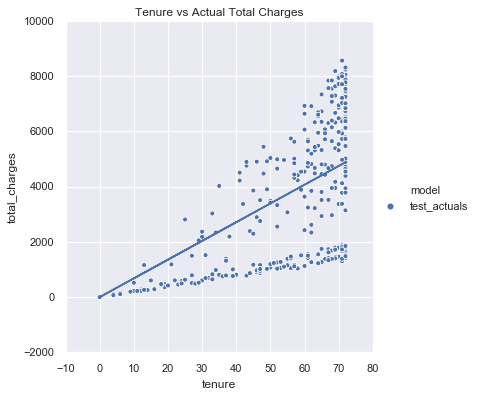

In [277]:
pd.DataFrame({'tenure' : X_test.tenure,
             'test_actuals' : y_test.total_charges})\
   .melt(id_vars=['tenure'], var_name='model', value_name='total_charges')\
   .pipe((sns.relplot, 'data'), x='tenure', y='total_charges', hue='model')
plt.plot
plt.title('Tenure vs Actual Total Charges')
x = X_test.tenure
y = y_test.total_charges
m = 67.8155
b = 0
plt.plot(x, b + m * x, '-')
plt.show()